In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw as powerlaw
from sklearn import preprocessing

,power_2,power_2_5,power_3,power_1_5
0,12.610237,6.994721,5.647169,47.756255
1,3.963294,2.449975,2.028150,6.909526
2,2.688877,3.529987,2.488424,2.620705
3,22.038670,5.425634,2.676836,261.534480
4,36.669351,2.521579,2.756484,1959.699471


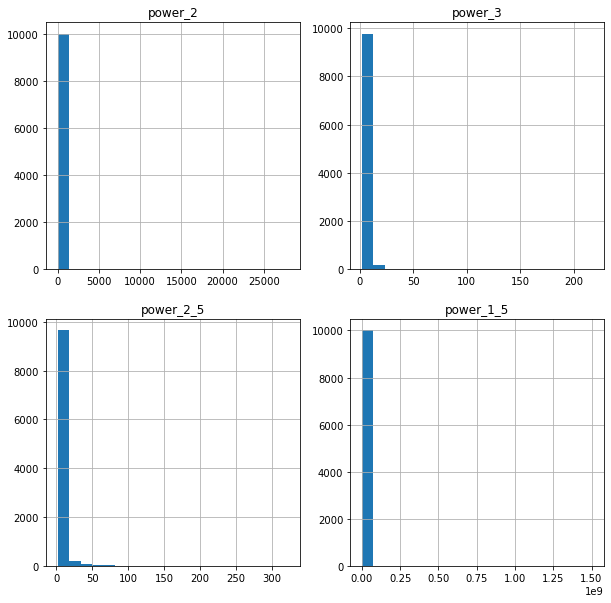

In [85]:
prob_df=pd.DataFrame()

#próbáljuk meg ezt lerajzolni hisztogramon, ahogy az előbb
prob_df["power_2"]=powerlaw.Power_Law(xmin=2, parameters=[2],
                                      discrete=False).generate_random(10000)
prob_df["power_2_5"]=powerlaw.Power_Law(xmin=2, parameters=[2.5],discrete=False).generate_random(10000)
prob_df["power_3"]=powerlaw.Power_Law(xmin=2, parameters=[3],discrete=False).generate_random(10000)
prob_df["power_1_5"]=powerlaw.Power_Law(xmin=2, parameters=[1.5],discrete=False).generate_random(10000)
fig,axes=plt.subplots(2,2,figsize=(10,10))
row=0
col=0
for pl  in ["power_2","power_2_5","power_3","power_1_5"]:
    prob_df[pl].hist(bins=20,ax=axes[row,col])
    #axes[row,col].bar(x=prob_df[pl].unique(),height=prob_df[pl].value_counts().sort_index())
    axes[row,col].set_title(pl)
    if row==1:
        col+=1
        row=0
    else:
        row+=1
prob_df.head()
#fit = powerlaw.Fit(simulated_data)
#fit.power_law.xmin, fit.power_law.alpha

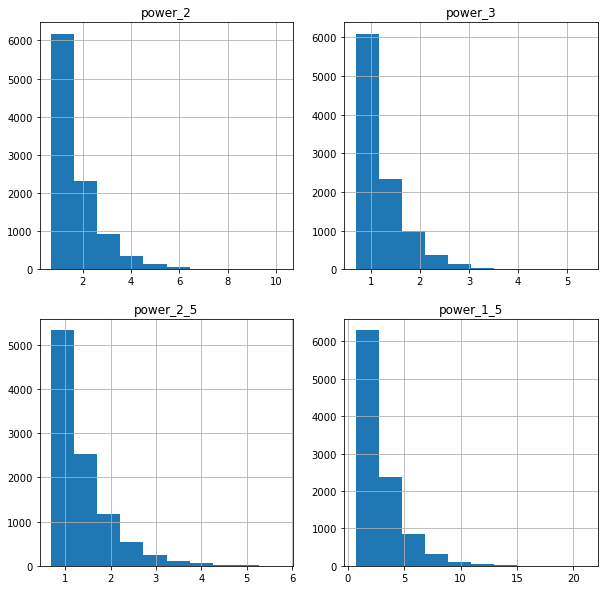

In [86]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
row=0
col=0
for pl  in ["power_2","power_2_5","power_3","power_1_5"]:
    np.log(prob_df[pl]).hist(bins=10,ax=axes[row,col])
    #axes[row,col].bar(x=prob_df[pl].unique(),height=prob_df[pl].value_counts().sort_index())
    axes[row,col].set_title(pl)
    #axes[row,col].set_yscale('log')

    if row==1:
        col+=1
        row=0
    else:
        row+=1

In [87]:
norm_2 = [float(i)/sum(prob_df["power_2"]) for i in prob_df["power_2"]]
norm_2_5 = [float(i)/sum(prob_df["power_2_5"]) for i in prob_df["power_2_5"]]
norm_3 = [float(i)/sum(prob_df["power_3"]) for i in prob_df["power_3"]]
norm_1_5 = [float(i)/sum(prob_df["power_1_5"]) for i in prob_df["power_1_5"]]


In [88]:
prob_normalized_df=pd.DataFrame()
prob_normalized_df["power_2_normalized"]=norm_2
prob_normalized_df["power_2_5_normalized"]=norm_2_5
prob_normalized_df["power_3_normalized"]=norm_3
prob_normalized_df["power_1_5_normalized"]=norm_1_5
prob_normalized_df

,power_2_normalized,power_2_5_normalized,power_3_normalized,power_1_5_normalized
0,0.000058,0.000127,0.000144,2.428073e-08
1,0.000018,0.000045,0.000052,3.513013e-09
2,0.000012,0.000064,0.000063,1.332446e-09
3,0.000101,0.000099,0.000068,1.329721e-07
4,0.000167,0.000046,0.000070,9.963707e-07
...,...,...,...,...
9995,0.000010,0.000086,0.000074,1.066816e-09
9996,0.000012,0.000058,0.000092,4.283030e-09
9997,0.000010,0.000046,0.000052,1.506195e-04
9998,0.000033,0.000063,0.000055,7.696334e-09


In [89]:
#normalizációs konstansok
norm_2_allando = 1/sum(prob_df["power_2"])
norm_2_5_allando = 1/sum(prob_df["power_2_5"])
norm_3_allando = 1/sum(prob_df["power_3"])
norm_1_5_allando = 1/sum(prob_df["power_1_5"])
print(norm_2_allando)
print(norm_2_5_allando)
print(norm_3_allando)
print(norm_1_5_allando)

4.5644631301781445e-06
1.8182328642348523e-05
2.5444399409296468e-05
5.084303453939106e-10


In [90]:
#ellenőrzés
prob_normalized_df["power_2cum"]=prob_normalized_df["power_2_normalized"].cumsum()
prob_normalized_df["power_3cum"]=prob_normalized_df["power_2_5_normalized"].cumsum()
prob_normalized_df["power_2_5cum"]=prob_normalized_df["power_3_normalized"].cumsum()
prob_normalized_df["power_1_5cum"]=prob_normalized_df["power_1_5_normalized"].cumsum()
prob_normalized_df

,power_2_normalized,power_2_5_normalized,power_3_normalized,power_1_5_normalized,power_2cum,power_3cum,power_2_5cum,power_1_5cum
0,0.000058,0.000127,0.000144,2.428073e-08,0.000058,0.000127,0.000144,2.428073e-08
1,0.000018,0.000045,0.000052,3.513013e-09,0.000076,0.000172,0.000195,2.779374e-08
2,0.000012,0.000064,0.000063,1.332446e-09,0.000088,0.000236,0.000259,2.912619e-08
3,0.000101,0.000099,0.000068,1.329721e-07,0.000189,0.000335,0.000327,1.620983e-07
4,0.000167,0.000046,0.000070,9.963707e-07,0.000356,0.000380,0.000397,1.158469e-06
...,...,...,...,...,...,...,...,...
9995,0.000010,0.000086,0.000074,1.066816e-09,0.999907,0.999763,0.999581,9.998494e-01
9996,0.000012,0.000058,0.000092,4.283030e-09,0.999919,0.999822,0.999673,9.998494e-01
9997,0.000010,0.000046,0.000052,1.506195e-04,0.999929,0.999868,0.999725,1.000000e+00
9998,0.000033,0.000063,0.000055,7.696334e-09,0.999962,0.999931,0.999780,1.000000e+00


In [91]:
from numpy.random import seed
from numpy.random import randint

erteklista = []
atlaglista = []
for i in range(5000000):
    seed(i)
    erteklista.append(randint(0,1000))
step = 10 
for i, _ in enumerate(erteklista[::step]):
    intervallum = erteklista[i*10:] if (i+1)*10 > len(erteklista) else erteklista[i*10:(i+1)*10]
    atlaglista.append((sum(intervallum)/len(intervallum)))
print(atlaglista)

[466.6, 564.9, 543.2, 577.0, 524.5, 533.0, 439.6, 545.7, 505.6, 397.4, 397.6, 463.8, 480.1, 519.5, 403.4, 593.6, 570.4, 495.1, 394.3, 608.8, 568.3, 438.2, 553.6, 636.8, 552.0, 517.9, 374.9, 358.9, 571.9, 349.5, 674.0, 670.5, 487.4, 396.8, 503.5, 634.3, 592.6, 504.3, 620.1, 492.8, 558.0, 534.8, 479.5, 374.0, 460.3, 584.6, 581.7, 423.9, 502.6, 503.9, 443.6, 363.6, 623.5, 434.7, 541.9, 518.8, 373.9, 649.1, 581.8, 468.6, 448.5, 497.1, 554.3, 353.8, 349.1, 543.7, 459.1, 563.3, 377.8, 439.2, 512.5, 387.1, 531.6, 437.4, 514.9, 512.1, 550.3, 375.0, 565.7, 488.6, 487.3, 551.9, 398.3, 419.9, 572.6, 607.9, 448.0, 443.3, 659.1, 539.0, 625.1, 625.3, 424.9, 485.8, 655.8, 569.7, 508.5, 402.2, 692.9, 589.3, 442.2, 374.1, 575.8, 609.1, 647.4, 323.3, 567.5, 389.1, 653.4, 464.7, 494.1, 470.6, 491.7, 425.5, 488.5, 407.2, 547.1, 592.4, 635.4, 550.1, 527.9, 497.7, 533.9, 546.4, 613.8, 418.3, 522.1, 671.9, 486.6, 512.8, 509.8, 590.2, 558.7, 600.0, 599.4, 418.4, 454.3, 485.3, 604.9, 278.1, 455.1, 440.1, 499.7

Text(0, 0.5, 'Gyakoriság')

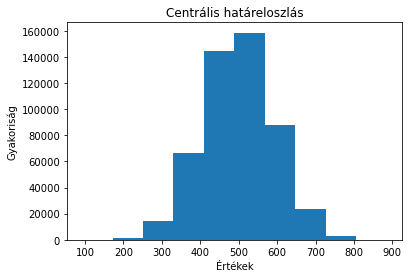

In [92]:
fig, ax = plt.subplots()
ax.hist(atlaglista)
ax.set_title('Centrális határeloszlás')
ax.set_xlabel('Értékek')
ax.set_ylabel('Gyakoriság')

In [93]:
bern_df=pd.DataFrame()
np.random.seed(2)
bern_10=np.random.binomial(1,0.5,10)
bern_100=np.random.binomial(1,0.5,100)
bern_1000=np.random.binomial(1,0.5,1000)
bern_10000=np.random.binomial(1,0.5,10000)
bern_100000=np.random.binomial(1,0.5,100000)


In [94]:
bern_10_avg=sum(bern_10)/len(bern_10)
bern_100_avg=sum(bern_100)/len(bern_100)
bern_1000_avg=sum(bern_1000)/len(bern_1000)
bern_10000_avg=sum(bern_10000)/len(bern_10000)
bern_100000_avg=sum(bern_100000)/len(bern_100000)

print(bern_10_avg)
print(bern_100_avg)
print(bern_1000_avg)
print(bern_10000_avg)
print(bern_100000_avg)

0.2
0.49
0.47
0.4916
0.49976


In [95]:
normal_df10=pd.DataFrame()
normal_df100=pd.DataFrame()
normal_df1000=pd.DataFrame()
normal_df10000=pd.DataFrame()
normal_df100000=pd.DataFrame()

normal_df10["10"] = np.random.normal(0,1,10)
normal_df100["100"] = np.random.normal(0,1,100)
normal_df1000["1000"] = np.random.normal(0,1,1000)
normal_df10000["10000"] = np.random.normal(0,1,10000)
normal_df100000["100000"] = np.random.normal(0,1,100000)

print(normal_df10)
print(normal_df100)
print(normal_df1000)
print(normal_df10000)
print(normal_df100000)

         10
0 -0.861979
1  0.382885
2  1.358484
3  0.008583
4  0.640587
5  0.622021
6 -0.025929
7 -0.082342
8  0.177465
9 -2.219965
         100
0   1.385007
1  -1.652587
2  -0.642836
3   1.752270
4  -0.690964
..       ...
95 -1.912545
96  1.568845
97  0.430179
98  0.927350
99 -0.919724

[100 rows x 1 columns]
         1000
0   -1.031615
1   -0.315062
2    1.226170
3   -0.340552
4    0.714713
..        ...
995 -0.074867
996  0.718289
997  1.348874
998  1.089107
999  0.804568

[1000 rows x 1 columns]
         10000
0     2.077472
1    -0.686839
2    -0.482442
3    -0.470384
4     2.169076
...        ...
9995  1.504383
9996  0.491579
9997 -1.145034
9998 -0.178327
9999 -0.092460

[10000 rows x 1 columns]
         100000
0      0.549442
1     -1.564906
2     -0.879089
3      0.859289
4     -0.365305
...         ...
99995  1.021602
99996  0.686445
99997 -0.543697
99998  0.318492
99999 -0.086033

[100000 rows x 1 columns]


In [99]:
bins=np.linspace(-3,3,50)

normal_df10["10_binned"] = pd.cut(normal_df10["10"],bins=bins)
normal_df100["100_binned"] = pd.cut(normal_df100["100"],bins=bins)
normal_df1000["1000_binned"] = pd.cut(normal_df1000["1000"],bins=bins)
normal_df10000["10000_binned"] = pd.cut(normal_df10000["10000"],bins=bins)
normal_df100000["100000_binned"] =pd.cut(normal_df100000["100000"],bins=bins)

In [100]:
density_df10=pd.DataFrame()
density_df100=pd.DataFrame()
density_df1000=pd.DataFrame()
density_df10000=pd.DataFrame()
density_df100000=pd.DataFrame()

density_df10["norm10"]=normal_df10["10_binned"].value_counts(normalize=True).sort_index()
density_df100["norm100"]=normal_df100["100_binned"].value_counts(normalize=True).sort_index()
density_df1000["norm1000"]=normal_df1000["1000_binned"].value_counts(normalize=True).sort_index()
density_df10000["norm10000"]=normal_df10000["10000_binned"].value_counts(normalize=True).sort_index()
density_df100000["norm100000"]=normal_df100000["100000_binned"].value_counts(normalize=True).sort_index()

Text(0.5, 1.0, 'Normal distribution 10000')

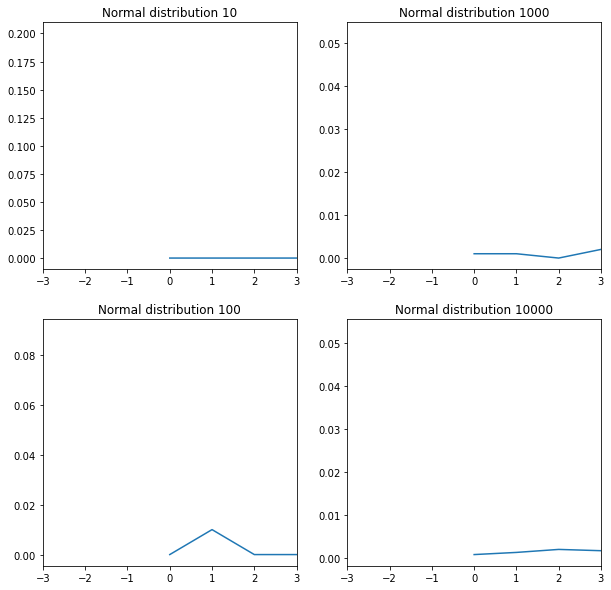

In [101]:

fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0,0].plot(density_df10["norm10"])
axes[0,0].set_xlim(-3,3)
axes[0,0].set_title("Normal distribution 10")

axes[1,0].plot(density_df100["norm100"])
axes[1,0].set_xlim(-3,3)
axes[1,0].set_title("Normal distribution 100")

axes[0,1].plot(density_df1000["norm1000"])
axes[0,1].set_xlim(-3,3)
axes[0,1].set_title("Normal distribution 1000")

axes[1,1].plot(density_df10000["norm10000"])
axes[1,1].set_xlim(-3,3)
axes[1,1].set_title("Normal distribution 10000")

In [ ]:
#n*p=lam (p=lam/n), n->ထ => p->0

In [157]:
prob_df["binom_10_10"]=np.random.binomial(10,0.001,10000)
prob_df["binom_100_10"]=np.random.binomial(100,0.001,10000)
prob_df["binom_500_10"]=np.random.binomial(500,0.001,10000)
prob_df["binom_5000_10"]=np.random.binomial(5000,0.001,10000)


print(prob_df["binom_10_10"].value_counts().sort_index())
print(prob_df["binom_100_10"].value_counts().sort_index())
print(prob_df["binom_500_10"].value_counts().sort_index())
print(prob_df["binom_5000_10"].value_counts().sort_index())


0    9897
1     103
Name: binom_10_10, dtype: int64
0    9045
1     917
2      37
3       1
Name: binom_100_10, dtype: int64
0    5920
1    3126
2     807
3     126
4      18
5       3
Name: binom_500_10, dtype: int64
0       66
1      312
2      810
3     1426
4     1765
5     1736
6     1487
7     1052
8      688
9      363
10     179
11      74
12      24
13      11
14       6
15       1
Name: binom_5000_10, dtype: int64


In [159]:
prob_df["binom_10_10"].value_counts().sort_index()

lam_10_10 = sum(prob_df["binom_10_10"])/10000
lam_100_10 = sum(prob_df["binom_100_10"])/10000
lam_500_10 = sum(prob_df["binom_500_10"])/10000
lam_5000_10 = sum(prob_df["binom_5000_10"])/10000


print(lam_10_10)
print(lam_100_10)
print(lam_500_10)
print(lam_5000_10)

0.0103
0.0994
0.5205
5.0141


In [161]:
prob_df["poi_10_10"]=np.random.poisson(lam_10_10,10000)
prob_df["poi_100_10"]=np.random.poisson(lam_100_10,10000)
prob_df["poi_500_10"]=np.random.poisson(lam_500_10,10000)
prob_df["poi_5000_10"]=np.random.poisson(lam_5000_10,10000)

prob_df

,power_2,power_2_5,power_3,power_1_5,binom_10_2,binom_10_10,poi_1,poi_5,binom_10_50,binom_10_80,...,poi_100_50,poi_1000_80,binom_500_80,poi_500_80,binom_100_10,binom_500_10,poi_100_10,poi_500_10,binom_5000_10,poi_5000_10
0,12.610237,6.994721,5.647169,47.756255,5,0,1,6,52,814,...,0,796,0,3,0,1,0,1,1,8
1,3.963294,2.449975,2.028150,6.909526,6,0,0,3,55,795,...,1,810,0,4,0,0,0,0,5,7
2,2.688877,3.529987,2.488424,2.620705,7,0,0,3,49,797,...,4,816,0,1,0,0,0,1,4,10
3,22.038670,5.425634,2.676836,261.534480,6,0,2,2,54,774,...,1,755,0,4,0,1,0,0,4,6
4,36.669351,2.521579,2.756484,1959.699471,3,0,1,6,49,798,...,2,783,0,1,0,0,0,0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.194302,4.743225,2.903969,2.098253,5,0,0,5,45,800,...,1,812,1,3,0,0,0,1,7,5
9996,2.554555,3.200109,3.624023,8.424024,6,0,1,3,52,810,...,0,770,0,3,0,0,0,0,5,3
9997,2.091088,2.556299,2.058755,296244.188669,5,0,0,7,56,804,...,1,791,0,2,1,1,0,1,5,2
9998,7.333588,3.477419,2.153990,15.137441,4,0,1,7,53,797,...,0,839,1,4,0,2,0,0,2,6


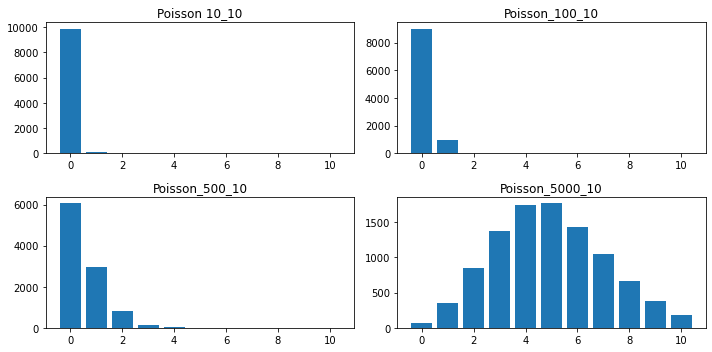

In [164]:
fig,axes=plt.subplots(2,2,figsize=(10,5))

axes[0,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_10_10"].value_counts().sort_index()).fillna(0))
axes[0,0].set_title("Poisson 10_10")

axes[0,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_100_10"].value_counts().sort_index()).fillna(0))
axes[0,1].set_title("Poisson_100_10")

axes[1,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_500_10"].value_counts().sort_index()).fillna(0))
axes[1,0].set_title("Poisson_500_10")

axes[1,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_5000_10"].value_counts().sort_index()).fillna(0))
axes[1,1].set_title("Poisson_5000_10")

plt.tight_layout()

<BarContainer object of 11 artists>

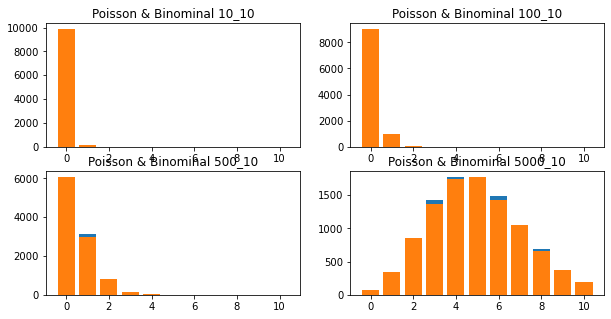

In [165]:
fig,axes=plt.subplots(2,2,figsize=(10,5))

axes[0,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["binom_10_10"].value_counts().sort_index()).fillna(0))
axes[0,0].set_title("Poisson & Binominal 10_10")
axes[0,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_10_10"].value_counts().sort_index()).fillna(0))

axes[0,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["binom_100_10"].value_counts().sort_index()).fillna(0))
axes[0,1].set_title("Poisson & Binominal 100_10")
axes[0,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_100_10"].value_counts().sort_index()).fillna(0))

axes[1,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["binom_500_10"].value_counts().sort_index()).fillna(0))
axes[1,0].set_title("Poisson & Binominal 500_10")
axes[1,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_500_10"].value_counts().sort_index()).fillna(0))

axes[1,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["binom_5000_10"].value_counts().sort_index()).fillna(0))
axes[1,1].set_title("Poisson & Binominal 5000_10")
axes[1,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_5000_10"].value_counts().sort_index()).fillna(0))
